In [1]:
# Import all necessary libraries 

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
sns.set()

# allowing all the columns to be visualized
pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
pd.set_option('display.max_rows', None)


In [3]:
fd= pd.read_csv("https://raw.githubusercontent.com/hippoghost/data-science-projects/master/adulthood/adulthood_dataframe.csv")

## EXPLORING DATA

## Inspecting DataFrame

In [4]:
full=fd

In [5]:
full.shape

(2897, 72)

In [6]:
full.head(1)

,tr_available_markets,tr_disc_number,tr_duration_ms,tr_explicit,tr_href,tr_id,tr_is_local,tr_name,tr_popularity,tr_preview_url,tr_track_number,tr_type,tr_uri,tr_track_artist_id,tr_album_album_type,tr_album_artists,tr_album_available_markets,tr_album_external_urls_spotify,tr_album_href,tr_album_id,tr_album_images,tr_album_name,tr_album_release_date,tr_album_release_date_precision,tr_album_total_tracks,tr_album_type,tr_album_uri,tr_external_ids_isrc,tr_external_urls_spotify,al_album_group,al_album_type,al_artists,al_available_markets,al_href,al_id,al_images,al_name,al_release_date,al_release_date_precision,al_total_tracks,al_type,al_uri,al_artist_id,al_external_urls_spotify,ar_href,ar_id,ar_images,ar_name,ar_popularity,ar_type,ar_uri,ar_external_urls_spotify,ar_followers_href,ar_followers_total,tf_danceability,tf_energy,tf_key,tf_loudness,tf_mode,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_type,tf_id,tf_uri,tf_track_href,tf_analysis_url,tf_duration_ms,tf_time_signature
0,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",1,38826,False,https://api.spotify.com/v1/tracks/6gUejkYukr6D...,6gUejkYukr6D9MfZaJawPS,False,"Churchill’s Speech - Live in Mexico City, Pala...",41,https://p.scdn.co/mp3-preview/501552516390e845...,1,track,spotify:track:6gUejkYukr6D9MfZaJawPS,6mdiAmATAx73kdxrNrnlao,album,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://open.spotify.com/album/6IVkf5av5jnraZp...,https://api.spotify.com/v1/albums/6IVkf5av5jnr...,6IVkf5av5jnraZpLPszoZR,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","Nights of the Dead, Legacy of the Beast: Live ...",2020-11-20,day,17,album,spotify:album:6IVkf5av5jnraZpLPszoZR,GBCHB2000001,https://open.spotify.com/track/6gUejkYukr6D9Mf...,album,album,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://api.spotify.com/v1/albums/6IVkf5av5jnr...,6IVkf5av5jnraZpLPszoZR,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","Nights of the Dead, Legacy of the Beast: Live ...",2020-11-20,day,17.0,album,spotify:album:6IVkf5av5jnraZpLPszoZR,6mdiAmATAx73kdxrNrnlao,https://open.spotify.com/album/6IVkf5av5jnraZp...,https://api.spotify.com/v1/artists/6mdiAmATAx7...,6mdiAmATAx73kdxrNrnlao,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Iron Maiden,77.0,artist,spotify:artist:6mdiAmATAx73kdxrNrnlao,https://open.spotify.com/artist/6mdiAmATAx73kd...,NaN,6201079.0,0.338,0.904,5,-12.851,0,0.161,0.433,0.134,0.91,0.0394,85.128,audio_features,6gUejkYukr6D9MfZaJawPS,spotify:track:6gUejkYukr6D9MfZaJawPS,https://api.spotify.com/v1/tracks/6gUejkYukr6D...,https://api.spotify.com/v1/audio-analysis/6gUe...,38827,3


In [7]:
full.tail(1)

,tr_available_markets,tr_disc_number,tr_duration_ms,tr_explicit,tr_href,tr_id,tr_is_local,tr_name,tr_popularity,tr_preview_url,tr_track_number,tr_type,tr_uri,tr_track_artist_id,tr_album_album_type,tr_album_artists,tr_album_available_markets,tr_album_external_urls_spotify,tr_album_href,tr_album_id,tr_album_images,tr_album_name,tr_album_release_date,tr_album_release_date_precision,tr_album_total_tracks,tr_album_type,tr_album_uri,tr_external_ids_isrc,tr_external_urls_spotify,al_album_group,al_album_type,al_artists,al_available_markets,al_href,al_id,al_images,al_name,al_release_date,al_release_date_precision,al_total_tracks,al_type,al_uri,al_artist_id,al_external_urls_spotify,ar_href,ar_id,ar_images,ar_name,ar_popularity,ar_type,ar_uri,ar_external_urls_spotify,ar_followers_href,ar_followers_total,tf_danceability,tf_energy,tf_key,tf_loudness,tf_mode,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_type,tf_id,tf_uri,tf_track_href,tf_analysis_url,tf_duration_ms,tf_time_signature
2896,"['CA', 'US']",5,154795,False,https://api.spotify.com/v1/tracks/31ff2s4BUKVx...,31ff2s4BUKVx0i0EKHM2Gc,False,(Anesthesia) – Pulling Teeth (Live at The Keys...,14,https://p.scdn.co/mp3-preview/d7041eea208c0bf5...,9,track,spotify:track:31ff2s4BUKVx0i0EKHM2Gc,2ye2Wgw4gimLv2eAKyk1NB,album,[{'external_urls': {'spotify': 'https://open.s...,"['CA', 'US']",https://open.spotify.com/album/7GttoSWxEi5lZvI...,https://api.spotify.com/v1/albums/7GttoSWxEi5l...,7GttoSWxEi5lZvIWeSrh6n,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Kill 'Em All (Deluxe Remaster),1983-07-25,day,54,album,spotify:album:7GttoSWxEi5lZvIWeSrh6n,QMKHM1600066,https://open.spotify.com/track/31ff2s4BUKVx0i0...,album,album,[{'external_urls': {'spotify': 'https://open.s...,"['CA', 'US']",https://api.spotify.com/v1/albums/7GttoSWxEi5l...,7GttoSWxEi5lZvIWeSrh6n,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Kill 'Em All (Deluxe Remaster),1983-07-25,day,54.0,album,spotify:album:7GttoSWxEi5lZvIWeSrh6n,2ye2Wgw4gimLv2eAKyk1NB,https://open.spotify.com/album/7GttoSWxEi5lZvI...,https://api.spotify.com/v1/artists/2ye2Wgw4gim...,2ye2Wgw4gimLv2eAKyk1NB,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Metallica,85.0,artist,spotify:artist:2ye2Wgw4gimLv2eAKyk1NB,https://open.spotify.com/artist/2ye2Wgw4gimLv2...,NaN,17257877.0,0.22,0.877,2,-7.49,1,0.06,0.689,0.84,0.868,0.55,101.343,audio_features,31ff2s4BUKVx0i0EKHM2Gc,spotify:track:31ff2s4BUKVx0i0EKHM2Gc,https://api.spotify.com/v1/tracks/31ff2s4BUKVx...,https://api.spotify.com/v1/audio-analysis/31ff...,154796,4


In [8]:
#full.info()

In [9]:
#full.dtypes

## Trimming redundant columns

In [10]:
full['ar_name'].unique()

array(['Iron Maiden', nan, 'Bruce Dickinson', 'Blind Guardian',
       'Iced Earth', 'Demons & Wizards', 'Theatre Of Tragedy',
       'Metallica'], dtype=object)

In [11]:
#Using the columns attribute to check DataFrame's columns

full.columns

Index(['tr_available_markets', 'tr_disc_number', 'tr_duration_ms',
       'tr_explicit', 'tr_href', 'tr_id', 'tr_is_local', 'tr_name',
       'tr_popularity', 'tr_preview_url', 'tr_track_number', 'tr_type',
       'tr_uri', 'tr_track_artist_id', 'tr_album_album_type',
       'tr_album_artists', 'tr_album_available_markets',
       'tr_album_external_urls_spotify', 'tr_album_href', 'tr_album_id',
       'tr_album_images', 'tr_album_name', 'tr_album_release_date',
       'tr_album_release_date_precision', 'tr_album_total_tracks',
       'tr_album_type', 'tr_album_uri', 'tr_external_ids_isrc',
       'tr_external_urls_spotify', 'al_album_group', 'al_album_type',
       'al_artists', 'al_available_markets', 'al_href', 'al_id', 'al_images',
       'al_name', 'al_release_date', 'al_release_date_precision',
       'al_total_tracks', 'al_type', 'al_uri', 'al_artist_id',
       'al_external_urls_spotify', 'ar_href', 'ar_id', 'ar_images', 'ar_name',
       'ar_popularity', 'ar_type', 'ar_uri', '

In [12]:
# dropping columns that won't be used for analysis

full=full.drop(columns=['tr_available_markets', 'tr_disc_number',
       'tr_href', 'tr_id', 'tr_is_local', 'tr_preview_url', 'tr_type',
       'tr_uri', 'tr_track_artist_id', 'tr_album_album_type',
       'tr_album_artists', 'tr_album_available_markets',
       'tr_album_external_urls_spotify', 'tr_album_href', 'tr_album_id',
       'tr_album_images', 'tr_album_name', 'tr_album_release_date',
       'tr_album_release_date_precision', 'tr_album_total_tracks',
       'tr_album_type', 'tr_album_uri', 'tr_external_ids_isrc',
       'tr_external_urls_spotify', 'al_album_group',
       'al_artists', 'al_available_markets', 'al_href', 'al_id', 'al_images','al_release_date_precision',
                       'al_type', 'al_uri', 'al_artist_id',
       'al_external_urls_spotify', 'ar_href', 'ar_id', 'ar_images','ar_type', 'ar_uri', 'ar_external_urls_spotify',
       'ar_followers_href','tf_type', 'tf_id', 'tf_uri',
        'tf_duration_ms' ,'tf_track_href','tf_analysis_url','tf_time_signature'])
#'

### Rearranging columns for convenience of analysis

In [13]:
#checking columns sequence

cols = list(full.columns.values)
cols

['tr_duration_ms',
 'tr_explicit',
 'tr_name',
 'tr_popularity',
 'tr_track_number',
 'al_album_type',
 'al_name',
 'al_release_date',
 'al_total_tracks',
 'ar_name',
 'ar_popularity',
 'ar_followers_total',
 'tf_danceability',
 'tf_energy',
 'tf_key',
 'tf_loudness',
 'tf_mode',
 'tf_speechiness',
 'tf_acousticness',
 'tf_instrumentalness',
 'tf_liveness',
 'tf_valence',
 'tf_tempo']

In [14]:
# rearranging columns

full = full[['ar_name','ar_popularity','tr_name','tr_popularity','al_name','al_release_date',
                     'al_total_tracks','al_album_type','ar_followers_total','tr_duration_ms',
                     'tr_track_number','tf_danceability','tf_energy','tf_loudness','tf_speechiness','tf_acousticness',
                    'tf_instrumentalness','tf_liveness','tf_valence','tf_tempo','tf_key','tf_mode','tr_explicit']]

In [15]:
# Checking dataset
full.head(1)

,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,tf_danceability,tf_energy,tf_loudness,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_key,tf_mode,tr_explicit
0,Iron Maiden,77.0,"Churchill’s Speech - Live in Mexico City, Pala...",41,"Nights of the Dead, Legacy of the Beast: Live ...",2020-11-20,17.0,album,6201079.0,38826,1,0.338,0.904,-12.851,0.161,0.433,0.134,0.91,0.0394,85.128,5,0,False


In [16]:
#inspecting DataFrame's shape, after removing unessecary information

full.shape

(2897, 23)

##  Descriptive statistics

In [17]:
full.describe()

,ar_popularity,tr_popularity,al_total_tracks,ar_followers_total,tr_duration_ms,tr_track_number,tf_danceability,tf_energy,tf_loudness,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_key,tf_mode
count,2430.000000,2897.000000,2430.000000,2.430000e+03,2.897000e+03,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.00000
mean,69.677366,24.526061,29.629218,7.356073e+06,3.362372e+05,6.857094,0.352973,0.870427,-6.839827,0.097163,0.051720,0.183767,0.412118,0.307665,123.517999,5.336210,0.52399
std,14.425074,15.030934,35.869778,7.394296e+06,1.318322e+05,4.617812,0.129665,0.158822,2.770297,0.073721,0.161107,0.285296,0.340983,0.185042,30.077134,3.435903,0.49951
min,46.000000,0.000000,6.000000,8.870800e+04,1.632500e+04,1.000000,0.075100,0.053300,-29.042000,0.024200,0.000001,0.000000,0.021300,0.000000,50.384000,0.000000,0.00000
25%,56.000000,15.000000,11.000000,4.228070e+05,2.558660e+05,3.000000,0.257000,0.841000,-7.843000,0.049000,0.000131,0.000741,0.115000,0.159000,99.366000,2.000000,0.00000
50%,77.000000,23.000000,17.000000,6.201079e+06,3.192400e+05,6.000000,0.326000,0.931000,-6.384000,0.077000,0.001160,0.019000,0.262000,0.280000,119.567000,5.000000,1.00000
75%,85.000000,35.000000,26.000000,1.725788e+07,4.048000e+05,9.000000,0.446000,0.970000,-5.205000,0.122000,0.010400,0.249000,0.769000,0.430000,142.503000,8.000000,1.00000
max,85.000000,80.000000,147.000000,1.725788e+07,1.168906e+06,31.000000,0.774000,0.999000,-0.463000,0.921000,0.995000,0.988000,1.000000,0.970000,207.012000,11.000000,1.00000


### Checking Skew

In [18]:
full[["ar_popularity","tr_popularity","al_total_tracks",
"ar_followers_total","tr_track_number","tr_duration_ms","tf_danceability","tf_energy","tf_loudness",
"tf_speechiness","tf_acousticness","tf_instrumentalness","tf_liveness","tf_valence","tf_tempo"]].skew()

ar_popularity         -0.297142
tr_popularity          0.383254
al_total_tracks        2.518765
ar_followers_total     0.432014
tr_track_number        1.147931
tr_duration_ms         1.050327
tf_danceability        0.511019
tf_energy             -2.316815
tf_loudness           -2.185625
tf_speechiness         3.540047
tf_acousticness        4.088503
tf_instrumentalness    1.466167
tf_liveness            0.600967
tf_valence             0.680616
tf_tempo               0.443862
dtype: float64

### Checking Kurtosis

In [19]:
full[["ar_popularity","tr_popularity","al_total_tracks",
"ar_followers_total","tr_duration_ms","tr_track_number","tf_danceability","tf_energy","tf_loudness",
"tf_speechiness","tf_acousticness","tf_instrumentalness","tf_liveness","tf_valence","tf_tempo"]].kurtosis()

ar_popularity          -1.541831
tr_popularity          -0.147956
al_total_tracks         5.115022
ar_followers_total     -1.566289
tr_duration_ms          4.544823
tr_track_number         1.816433
tf_danceability        -0.488331
tf_energy               5.815574
tf_loudness             8.215857
tf_speechiness         24.872391
tf_acousticness        16.776788
tf_instrumentalness     0.692326
tf_liveness            -1.290737
tf_valence             -0.049289
tf_tempo               -0.557692
dtype: float64

In [20]:
#Renaming columns for convenience

full_renamed = full.rename(columns = {'tf_danceability': 'danceability', 'tf_energy': 'energy',
                                     'tf_loudness':'loudness','tf_speechiness':'speechiness','tf_acousticness':'acousticness',
                                     'tf_liveness':'liveness','tf_valence':'valence','tf_tempo':'tempo',
                                     'tf_mode':'mode','tf_instrumentalness':'instrumentalness'}, inplace = False)

full_renamed.head(1)

,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tf_key,mode,tr_explicit
0,Iron Maiden,77.0,"Churchill’s Speech - Live in Mexico City, Pala...",41,"Nights of the Dead, Legacy of the Beast: Live ...",2020-11-20,17.0,album,6201079.0,38826,1,0.338,0.904,-12.851,0.161,0.433,0.134,0.91,0.0394,85.128,5,0,False


# Setting Index

In [21]:
# setting artist name as index

#index=full_renamed.set_index(["ar_name","al_name"]).sort_values(by="ar_name", ascending=True)
#index

# Identifying missing values

In [22]:
#using info method , getting a gist of the dataset

full_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2897 entries, 0 to 2896
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ar_name             2430 non-null   object 
 1   ar_popularity       2430 non-null   float64
 2   tr_name             2897 non-null   object 
 3   tr_popularity       2897 non-null   int64  
 4   al_name             2430 non-null   object 
 5   al_release_date     2430 non-null   object 
 6   al_total_tracks     2430 non-null   float64
 7   al_album_type       2430 non-null   object 
 8   ar_followers_total  2430 non-null   float64
 9   tr_duration_ms      2897 non-null   int64  
 10  tr_track_number     2897 non-null   int64  
 11  danceability        2897 non-null   float64
 12  energy              2897 non-null   float64
 13  loudness            2897 non-null   float64
 14  speechiness         2897 non-null   float64
 15  acousticness        2897 non-null   float64
 16  instru

# Total missing values

In [23]:
full_renamed.isnull().values.sum()

3269

In [24]:
#another way of checking missing values
full_renamed.isna().values.sum()

3269

In [25]:
#Creating a null dataframe

null_dataframe=full_renamed.isnull()

In [26]:
#find out missing values per column
null_dataframe.sum()

ar_name               467
ar_popularity         467
tr_name                 0
tr_popularity           0
al_name               467
al_release_date       467
al_total_tracks       467
al_album_type         467
ar_followers_total    467
tr_duration_ms          0
tr_track_number         0
danceability            0
energy                  0
loudness                0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
tf_key                  0
mode                    0
tr_explicit             0
dtype: int64

# Percentage of missing columns

In [27]:
percentage=null_dataframe.mean()*100

print('Percentage of Missing Values:\n',percentage)

Percentage of Missing Values:
 ar_name               16.120124
ar_popularity         16.120124
tr_name                0.000000
tr_popularity          0.000000
al_name               16.120124
al_release_date       16.120124
al_total_tracks       16.120124
al_album_type         16.120124
ar_followers_total    16.120124
tr_duration_ms         0.000000
tr_track_number        0.000000
danceability           0.000000
energy                 0.000000
loudness               0.000000
speechiness            0.000000
acousticness           0.000000
instrumentalness       0.000000
liveness               0.000000
valence                0.000000
tempo                  0.000000
tf_key                 0.000000
mode                   0.000000
tr_explicit            0.000000
dtype: float64


### Better understanding of missing values comes with the visualization of the amount of missing values using missingno package

### missingno library provides functions for graphical analysis of missing data

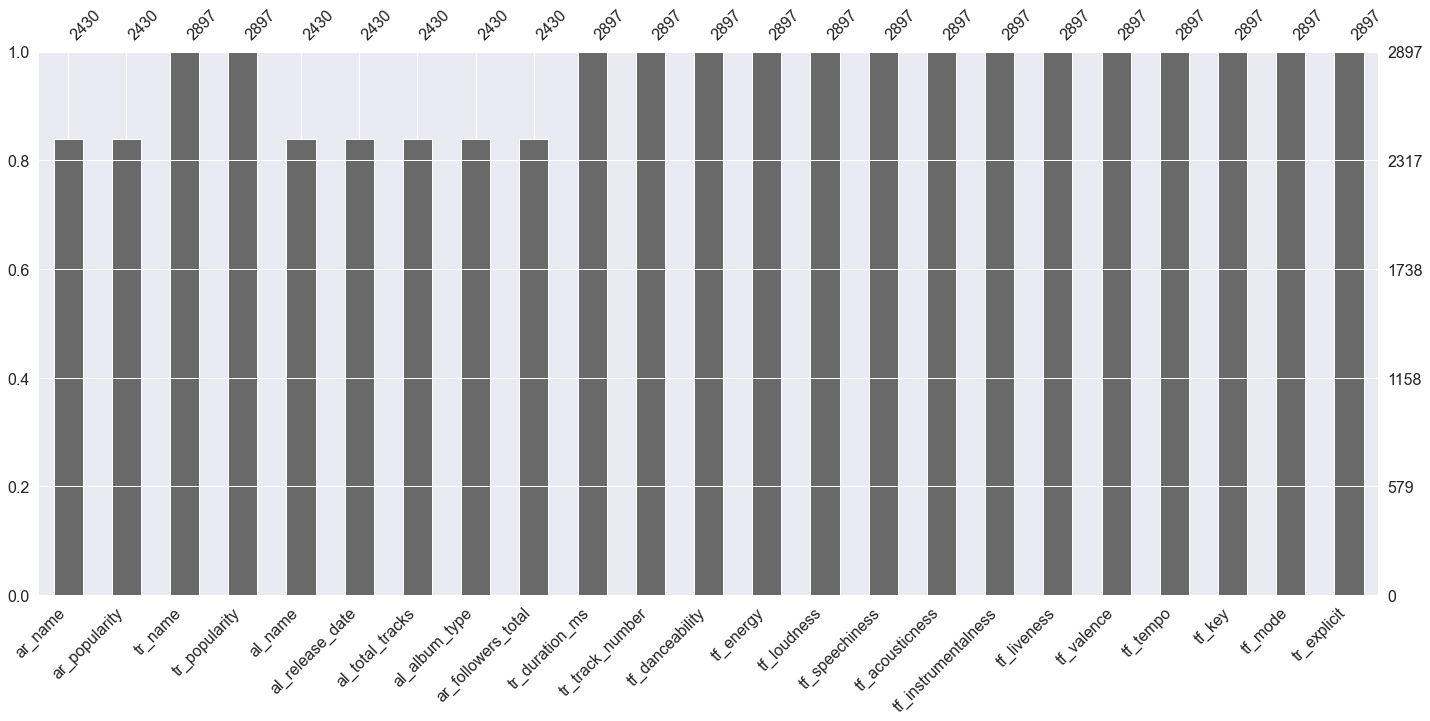

In [28]:
#Visualizing the completness of the dataset , bar chart of missing values
import missingno as msno
msno.bar(full)


## Visualize the locations of missing values
### it describes the nullity in the dataset and appears blank wherever there are missing values
### the sparkline on the right summarizes the general shape of data completness and points out the row with the 
### minimum number of null values in the DataFrame and the total amount of columns

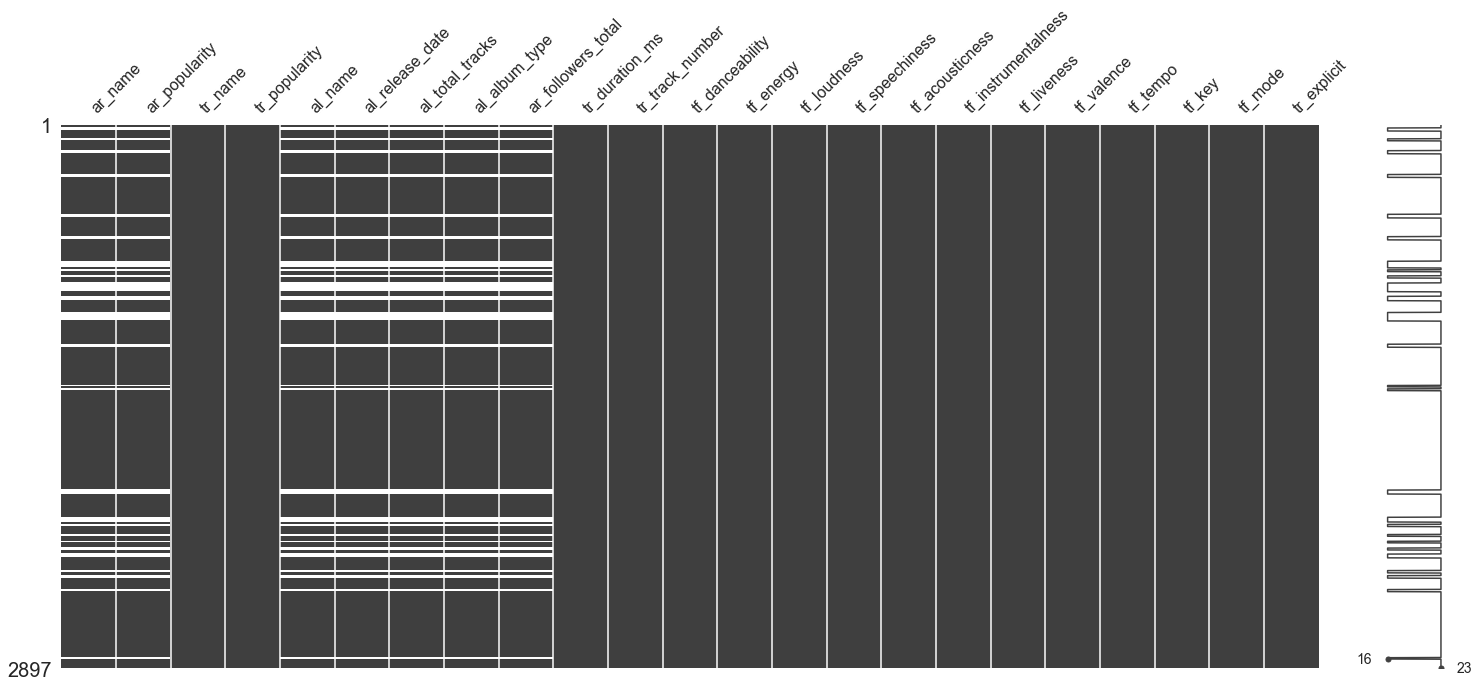

In [29]:
msno.matrix(full)

# Missingness HeatMap

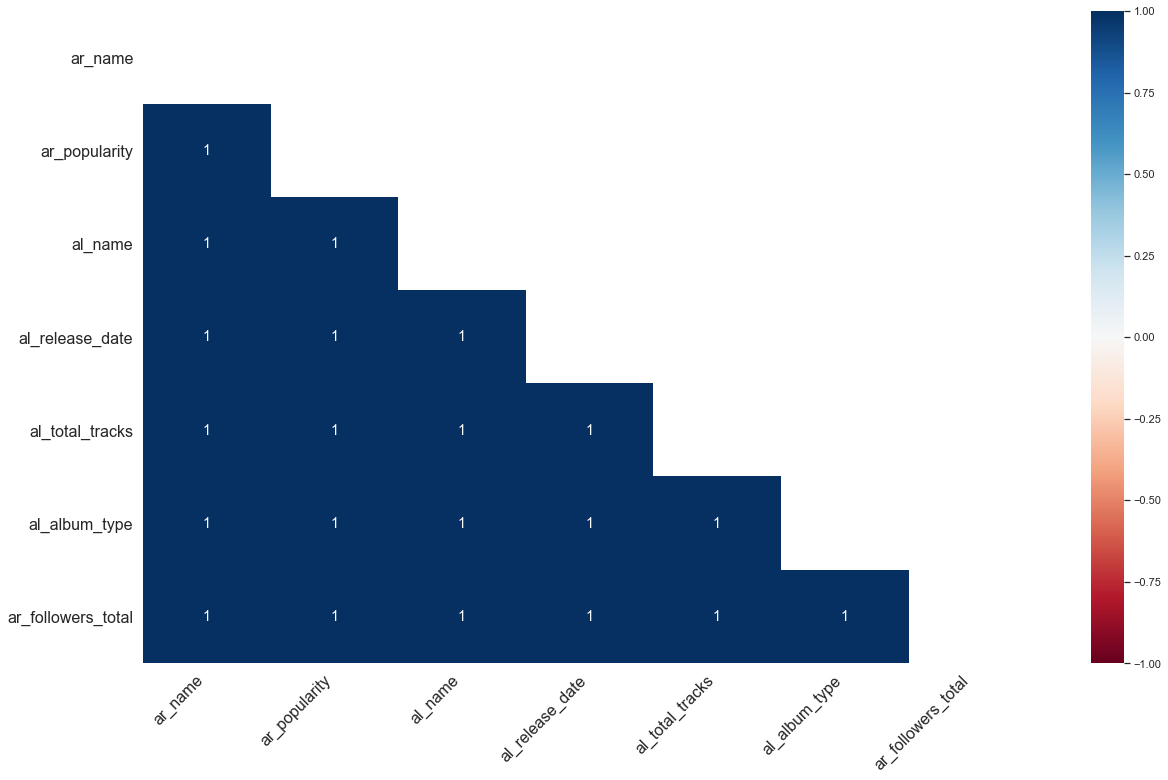

In [30]:
msno.heatmap(full)

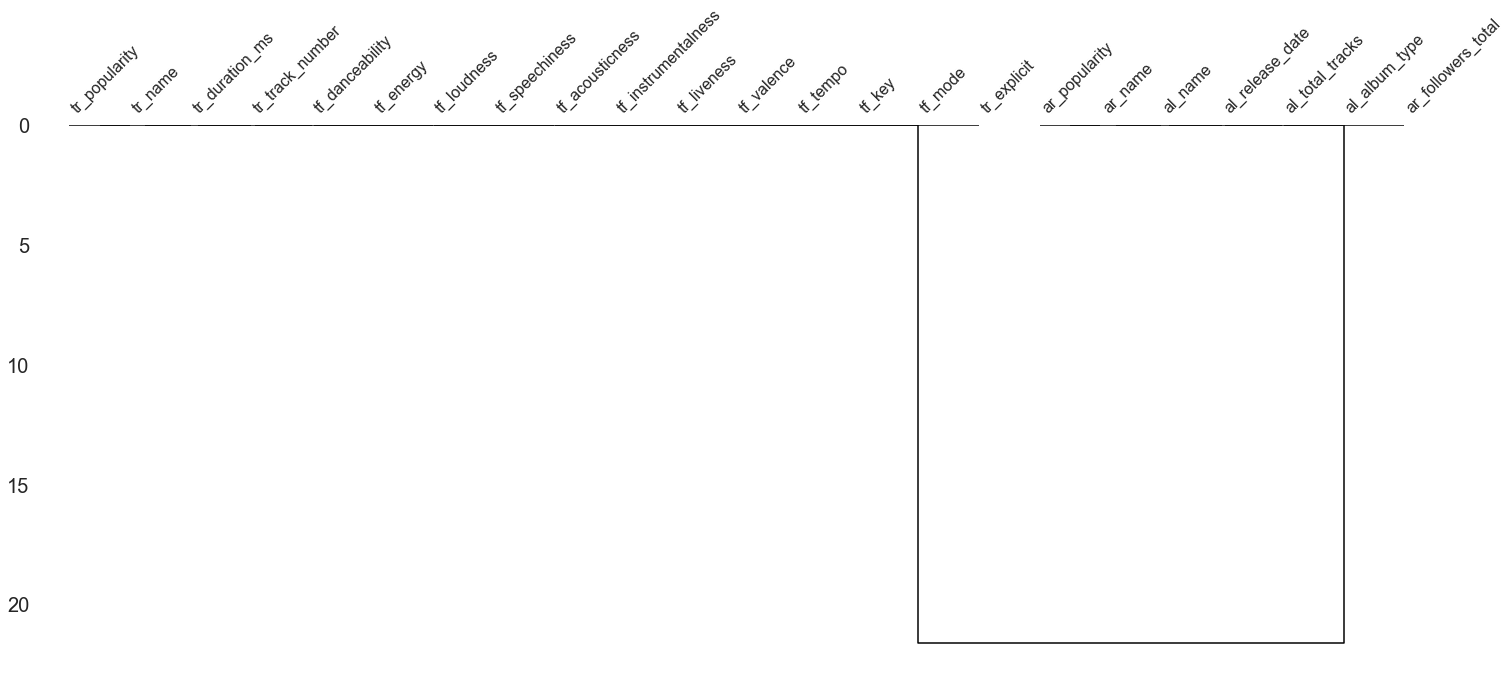

In [31]:
msno.dendrogram(full)

# Imputing Techniques

In [32]:
#creating null_dataframe out of the original to play around with missing values
null_dataframe=full_renamed

#checking some null values
null_dataframe[17:20]

,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tf_key,mode,tr_explicit
17,NaN,NaN,"Churchill’s Speech - Live in Mexico City, Pala...",25,NaN,NaN,NaN,NaN,NaN,38826,1,0.338,0.904,-12.851,0.161,0.433000,0.1340,0.910,0.0394,85.128,5,0,False
18,NaN,NaN,"Aces High - Live in Mexico City, Palacio de lo...",28,NaN,NaN,NaN,NaN,NaN,298789,2,0.273,0.997,-4.956,0.126,0.007680,0.0469,0.852,0.0704,127.267,7,1,False
19,NaN,NaN,"Where Eagles Dare - Live in Mexico City, Palac...",25,NaN,NaN,NaN,NaN,NaN,312688,3,0.237,0.996,-4.678,0.140,0.000254,0.1020,0.713,0.1010,113.782,9,1,False


# 1st technique, fillna method

In [33]:
#imputing popularity column with value of choice

null_dataframe["ar_popularity"][17:33]=null_dataframe["ar_popularity"][17:33].fillna("77")
null_dataframe.iloc[17:33].head(2)


<ipython-input-33-515fb3e20ea6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_dataframe["ar_popularity"][17:33]=null_dataframe["ar_popularity"][17:33].fillna("77")


,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tf_key,mode,tr_explicit
17,NaN,77,"Churchill’s Speech - Live in Mexico City, Pala...",25,NaN,NaN,NaN,NaN,NaN,38826,1,0.338,0.904,-12.851,0.161,0.43300,0.1340,0.910,0.0394,85.128,5,0,False
18,NaN,77,"Aces High - Live in Mexico City, Palacio de lo...",28,NaN,NaN,NaN,NaN,NaN,298789,2,0.273,0.997,-4.956,0.126,0.00768,0.0469,0.852,0.0704,127.267,7,1,False


# 2nd technique, replace method

In [34]:
null_dataframe["ar_popularity"][75:86]=null_dataframe["ar_popularity"][75:86].replace(np.nan,77)

null_dataframe.iloc[75:86].head(2)


<ipython-input-34-e7d22924a26a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_dataframe["ar_popularity"][75:86]=null_dataframe["ar_popularity"][75:86].replace(np.nan,77)


,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tf_key,mode,tr_explicit
75,NaN,77,If Eternity Should Fail,50,NaN,NaN,NaN,NaN,NaN,508207,1,0.291,0.868,-6.499,0.0611,0.006790,0.000413,0.118,0.149,117.931,7,1,False
76,NaN,77,Speed of Light,52,NaN,NaN,NaN,NaN,NaN,301745,2,0.176,0.974,-5.778,0.1320,0.000419,0.000026,0.107,0.334,185.491,7,0,False


In [35]:
#imputing artist name column with with "artist name" of  choice
null_dataframe["ar_name"][75:80]=null_dataframe["ar_name"][75:80].replace(np.nan,"Iron Maiden")
null_dataframe.iloc[75:80].head(2)


<ipython-input-35-b767cb6be9e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_dataframe["ar_name"][75:80]=null_dataframe["ar_name"][75:80].replace(np.nan,"Iron Maiden")


,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tf_key,mode,tr_explicit
75,Iron Maiden,77,If Eternity Should Fail,50,NaN,NaN,NaN,NaN,NaN,508207,1,0.291,0.868,-6.499,0.0611,0.006790,0.000413,0.118,0.149,117.931,7,1,False
76,Iron Maiden,77,Speed of Light,52,NaN,NaN,NaN,NaN,NaN,301745,2,0.176,0.974,-5.778,0.1320,0.000419,0.000026,0.107,0.334,185.491,7,0,False


# 3rd method replace rows based on criteria of other rows

In [36]:
#imputing artist name column with "artist name" of  choice
null_dataframe["ar_name"]=np.where(null_dataframe["ar_popularity"]==77,
                                            null_dataframe["ar_name"].fillna('Iron Maiden'),
                                            null_dataframe["ar_popularity"])

null_dataframe.iloc[76:86].head(2)


,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tf_key,mode,tr_explicit
76,Iron Maiden,77,Speed of Light,52,NaN,NaN,NaN,NaN,NaN,301745,2,0.176,0.974,-5.778,0.132,0.000419,0.000026,0.107,0.3340,185.491,7,0,False
77,Iron Maiden,77,The Great Unknown,40,NaN,NaN,NaN,NaN,NaN,397655,3,0.211,0.897,-6.629,0.201,0.019500,0.000189,0.108,0.0702,92.082,2,1,False


## ADDING NEW FEATURES(variables)

In [37]:
#Creating new dataframe new_features_added
new_features_added=full

### Creating feature "lyrics"

In [38]:
con = [
    (new_features_added["tf_instrumentalness"]>0.800) & (new_features_added["tf_speechiness"]<0.0400 ),
    new_features_added["tf_instrumentalness"]<0.800 ,
]

In [39]:
out = ["no_lyrics", "lyrics"]

In [40]:
result = np.select(con, out)
#pd.Series(result)

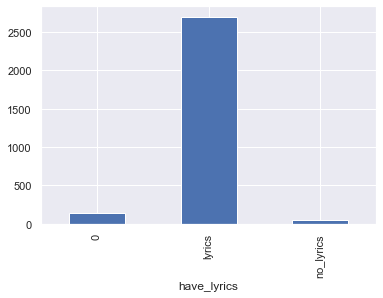

In [41]:
#visualizing how many tracks do have lyrics or not
new_features_added["have_lyrics"]=result
new_features_added.groupby("have_lyrics")["ar_name"].size().plot(kind="bar")


### Creating feature "tracks_per_artist"

In [42]:
#This option will give you a column with repeated values of the counts,


z = new_features_added['ar_name'].value_counts() 

#converts to dictionary
z1 = z.to_dict() 

new_features_added['tracks_per_artist'] = new_features_added['ar_name'].map(z1) 
new_features_added.head(1)

,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,tf_danceability,tf_energy,tf_loudness,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_key,tf_mode,tr_explicit,have_lyrics,tracks_per_artist
0,Iron Maiden,77.0,"Churchill’s Speech - Live in Mexico City, Pala...",41,"Nights of the Dead, Legacy of the Beast: Live ...",2020-11-20,17.0,album,6201079.0,38826,1,0.338,0.904,-12.851,0.161,0.433,0.134,0.91,0.0394,85.128,5,0,False,lyrics,557.0


In [43]:
# checking total tracks per artist

new_features_added.groupby("ar_name")["tracks_per_artist"].count().sort_values(ascending=False)


ar_name
Metallica             815
Iron Maiden           557
Blind Guardian        318
Iced Earth            275
Bruce Dickinson       215
Demons & Wizards      129
Theatre Of Tragedy    121
Name: tracks_per_artist, dtype: int64

In [44]:
#Filtering DataFrame by ar_name & total tracks per artist

new_features_added.groupby(["ar_name","tracks_per_artist"]).sum().sort_values(by="tracks_per_artist",ascending=False)



,,ar_popularity,tr_popularity,al_total_tracks,ar_followers_total,tr_duration_ms,tr_track_number,tf_danceability,tf_energy,tf_loudness,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_key,tf_mode,tr_explicit
ar_name,tracks_per_artist,,,,,,,,,,,,,,,,,,
Metallica,815.0,69275.0,25131,45459.0,1.406517e+10,282123231,6230,276.8828,700.6634,-6205.655,79.6448,63.936490,237.252963,359.9055,256.4599,98642.882,4438,475,109
Iron Maiden,557.0,42889.0,16619,7916.0,3.454001e+09,203571455,3063,146.5976,518.8380,-3053.089,66.6405,21.441015,33.009253,295.3101,168.3856,67440.921,2755,256,20
Blind Guardian,318.0,18762.0,6286,5472.0,1.623269e+08,104592564,2736,111.0342,273.4490,-2228.764,29.8987,28.238932,72.506977,128.6652,73.6559,41781.113,1816,133,0
Iced Earth,275.0,14850.0,5180,4851.0,7.591760e+07,84382884,1799,110.3740,240.8403,-2097.705,35.1026,9.945971,61.591387,80.2524,75.1842,33802.810,1722,155,5
Bruce Dickinson,215.0,12040.0,2964,4643.0,9.090350e+07,62866301,1426,91.0200,175.3090,-1500.627,13.8913,4.478440,8.361390,65.0952,80.6989,26910.741,1108,111,1
Demons & Wizards,129.0,5934.0,2009,2347.0,1.144333e+07,41612253,1095,60.0520,110.6080,-928.892,9.8544,5.051896,46.942756,19.0768,39.1904,15958.258,725,55,0
Theatre Of Tragedy,121.0,5566.0,2189,1311.0,1.549538e+07,36450776,652,58.2210,94.1520,-840.033,5.6351,4.165038,32.091539,40.0006,44.0761,14428.199,576,64,0


## CREATING DATAFRAMES FILTERED BY NEW ADDED FEATURES

### Creating "no_lyr" DataFrame , consisting of non lyrics track

In [45]:
no_lyr=new_features_added[new_features_added["have_lyrics"]=="no_lyrics"]

In [46]:
no_lyr.shape


(52, 25)

### Creating "lyr" DataFrame, consisting of tracks with lyrics

In [47]:
lyr=new_features_added[new_features_added["have_lyrics"]=="lyrics"]

In [48]:
lyr.shape


(2698, 25)

### Creating "explicit" DataFrame, consisting of tracks with explicit lyrics

In [49]:
explicit=new_features_added[new_features_added["tr_explicit"]==True]

In [50]:
explicit.shape

(154, 25)

In [51]:
explicit.head(2)

,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,tf_danceability,tf_energy,tf_loudness,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_key,tf_mode,tr_explicit,have_lyrics,tracks_per_artist
13,Iron Maiden,77.0,"Iron Maiden - Live in Mexico City, Palacio de ...",35,"Nights of the Dead, Legacy of the Beast: Live ...",2020-11-20,17.0,album,6201079.0,330981,5,0.137,0.992,-5.179,0.236,0.00171,0.0126,0.891,0.148,183.261,9,0,True,lyrics,557.0
30,NaN,NaN,"Iron Maiden - Live in Mexico City, Palacio de ...",20,NaN,NaN,NaN,NaN,NaN,330981,14,0.137,0.992,-5.179,0.236,0.00171,0.0126,0.891,0.148,183.261,9,0,True,lyrics,NaN


### Creating "non_explicit" DataFrame,, consisting of tracks with non explicit lyrics

In [52]:
non_explicit=new_features_added[new_features_added["tr_explicit"]==False]

In [53]:
non_explicit.shape

(2743, 25)

## ENCODING ADDED FEATURES("lyrics,explicit_lyrics"), IN BINARY VARIABLES

#### encoding is used to enable further analysis , in order to examine IF & HOW new, added feautres are correlated with each other,
#### but to the rest of the feautures as well.

## Encoding variable "lyrics"

In [54]:
#  1=lyrics & 0=no_lyrics    

#importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
new_features_added["lyr_encoded"]=le.fit_transform(new_features_added["have_lyrics"])

## Encoding variable "explicit_lyrics"

In [55]:
#  1=explicit & 0=non_explicit

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
new_features_added["explicit_encoded"]=le.fit_transform(new_features_added["tr_explicit"])

In [56]:
#Inspecting shape after encoding variables

new_features_added.shape

(2897, 27)

In [57]:
new_features_added.head(1)


,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,tf_danceability,tf_energy,tf_loudness,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_key,tf_mode,tr_explicit,have_lyrics,tracks_per_artist,lyr_encoded,explicit_encoded
0,Iron Maiden,77.0,"Churchill’s Speech - Live in Mexico City, Pala...",41,"Nights of the Dead, Legacy of the Beast: Live ...",2020-11-20,17.0,album,6201079.0,38826,1,0.338,0.904,-12.851,0.161,0.433,0.134,0.91,0.0394,85.128,5,0,False,lyrics,557.0,1,0


In [58]:
#creating a new DataFrame "features" including only quantative data thus the  encoded variables as well
#"features" DataFrame will also be later used for machine learning models

features=new_features_added[["ar_popularity","tr_popularity","al_total_tracks",
"ar_followers_total","tr_duration_ms","tr_track_number","tf_danceability","tf_energy","tf_loudness",
"tf_speechiness","tf_acousticness","tf_instrumentalness","tf_liveness","tf_valence","tf_tempo","tf_mode","tf_key",
   "lyr_encoded","explicit_encoded","tracks_per_artist"]]

## C.EXLPLORATORY DATA ANALYSIS

### EXAMINING CORRELATIONS

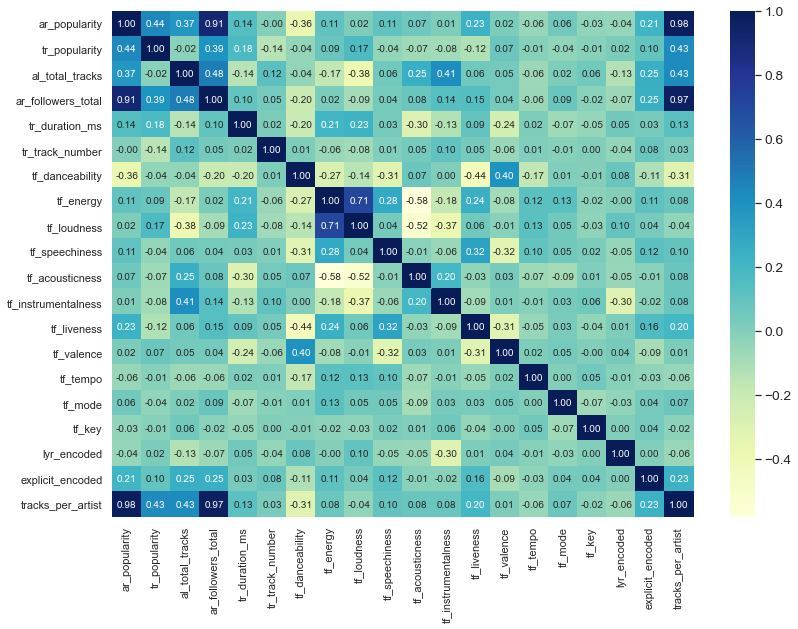

In [59]:
corr = features.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt='.2f', annot_kws={'size': 10})
plt.tight_layout()


In [60]:
corr.style.background_gradient().set_precision(2)

,ar_popularity,tr_popularity,al_total_tracks,ar_followers_total,tr_duration_ms,tr_track_number,tf_danceability,tf_energy,tf_loudness,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_mode,tf_key,lyr_encoded,explicit_encoded,tracks_per_artist
ar_popularity,1.00,0.44,0.37,0.91,0.14,-0.00,-0.36,0.11,0.02,0.11,0.07,0.01,0.23,0.02,-0.06,0.06,-0.03,-0.04,0.21,0.98
tr_popularity,0.44,1.00,-0.02,0.39,0.18,-0.14,-0.04,0.09,0.17,-0.04,-0.07,-0.08,-0.12,0.07,-0.01,-0.04,-0.01,0.02,0.10,0.43
al_total_tracks,0.37,-0.02,1.00,0.48,-0.14,0.12,-0.04,-0.17,-0.38,0.06,0.25,0.41,0.06,0.05,-0.06,0.02,0.06,-0.13,0.25,0.43
ar_followers_total,0.91,0.39,0.48,1.00,0.10,0.05,-0.20,0.02,-0.09,0.04,0.08,0.14,0.15,0.04,-0.06,0.09,-0.02,-0.07,0.25,0.97
tr_duration_ms,0.14,0.18,-0.14,0.10,1.00,0.02,-0.20,0.21,0.23,0.03,-0.30,-0.13,0.09,-0.24,0.02,-0.07,-0.05,0.05,0.03,0.13
tr_track_number,-0.00,-0.14,0.12,0.05,0.02,1.00,0.01,-0.06,-0.08,0.01,0.05,0.10,0.05,-0.06,0.01,-0.01,0.00,-0.04,0.08,0.03
tf_danceability,-0.36,-0.04,-0.04,-0.20,-0.20,0.01,1.00,-0.27,-0.14,-0.31,0.07,0.00,-0.44,0.40,-0.17,0.01,-0.01,0.08,-0.11,-0.31
tf_energy,0.11,0.09,-0.17,0.02,0.21,-0.06,-0.27,1.00,0.71,0.28,-0.58,-0.18,0.24,-0.08,0.12,0.13,-0.02,-0.00,0.11,0.08
tf_loudness,0.02,0.17,-0.38,-0.09,0.23,-0.08,-0.14,0.71,1.00,0.04,-0.52,-0.37,0.06,-0.01,0.13,0.05,-0.03,0.10,0.04,-0.04
tf_speechiness,0.11,-0.04,0.06,0.04,0.03,0.01,-0.31,0.28,0.04,1.00,-0.01,-0.06,0.32,-0.32,0.10,0.05,0.02,-0.05,0.12,0.10


## PLOTTING ECDF's

##  Ecdf danceability


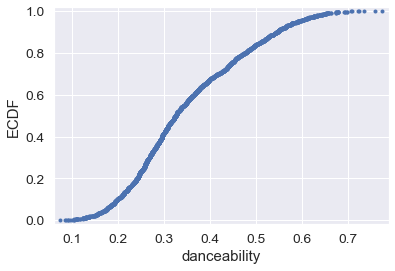

In [61]:
#60% of the tracks have 40% or less danceability meaning that only 40% of tracks have danceabilty >60%
x=np.sort(full["tf_danceability"])
y=np.arange(1,len(x)+1)/len(x)
_=plt.plot(x,y,marker=".",linestyle="none")
_=plt.xlabel("danceability")
_=plt.ylabel("ECDF")
plt.margins(0.02)
plt.show()


##  Ecdf valence

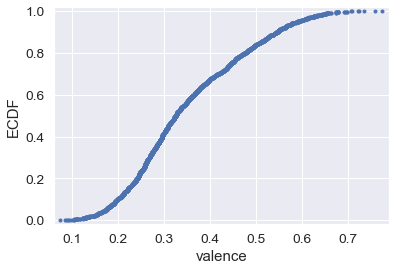

In [62]:
#50% of the tracks have 40% or less valence  

np.sort(full["tf_valence"])
y=np.arange(1,len(x)+1)/len(x)
_=plt.plot(x,y,marker=".",linestyle="none")
_=plt.xlabel("valence")
_=plt.ylabel("ECDF")
plt.margins(0.02)
plt.show()

## Ecdf of track popularity

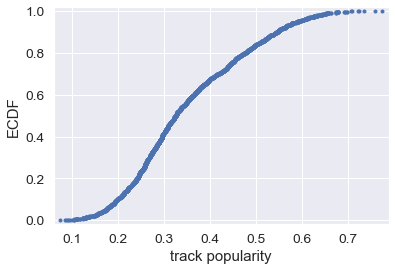

In [63]:

#80% of the tracks have more than 50% popularity

np.sort(full["tr_popularity"])
y=np.arange(1,len(x)+1)/len(x)
_=plt.plot(x,y,marker=".",linestyle="none")
_=plt.xlabel("track popularity")
_=plt.ylabel("ECDF")
plt.margins(0.02)
plt.show()

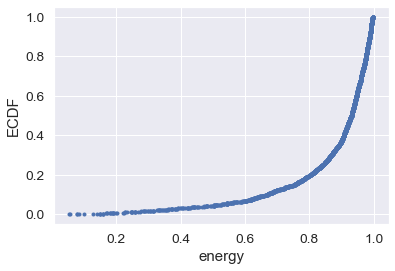

In [64]:
#20% of the tracks have 40% or less energy level

x=np.sort(full["tf_energy"])
y=np.arange(1,len(x)+1)/len(x)
_=plt.plot(x,y,marker=".",linestyle="none")
_=plt.xlabel("energy")
_=plt.ylabel("ECDF")
#plt.margins(0.02)
#plt.show()

In [65]:
def ecdf(dataframe):
    
    """Compute ECDF """
    # Number of data points: n
    n = len(dataframe)

    # x-data for the ECDF: x
    x = np.sort(dataframe)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

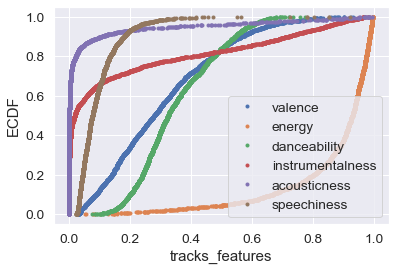

In [66]:
#COMPARISON OF ECDF's
# Compute ECDFs

x_val, y_val=ecdf(new_features_added["tf_valence"])
x_enrg, y_enrg=ecdf(new_features_added["tf_energy"])
x_danc,y_danc=ecdf(new_features_added["tf_danceability"])
x_instr,y_instr=ecdf(new_features_added["tf_instrumentalness"])

x_acoust,y_acoust=ecdf(new_features_added["tf_acousticness"])
x_speech,y_speech=ecdf(new_features_added["tf_speechiness"])





# Plot all ECDFs on the same plot

_ = plt.plot(x_val, y_val, marker = '.', linestyle = 'none')
_ = plt.plot(x_enrg, y_enrg, marker = '.', linestyle = 'none')
_ = plt.plot(x_danc,y_danc, marker = '.', linestyle = 'none')
_ = plt.plot(x_instr,y_instr, marker = '.', linestyle = 'none')
_ = plt.plot(x_acoust,y_acoust, marker = '.', linestyle = 'none')
_ = plt.plot(x_speech,y_speech, marker = '.', linestyle = 'none')




# Annotate the plot
plt.legend(('valence', 'energy', 'danceability','instrumentalness','acousticness','speechiness','loudness'), loc='lower right')
_ = plt.xlabel('tracks_features')
_ = plt.ylabel('ECDF')


plt.show()

## Ecdf "explicit lyrics" feauture

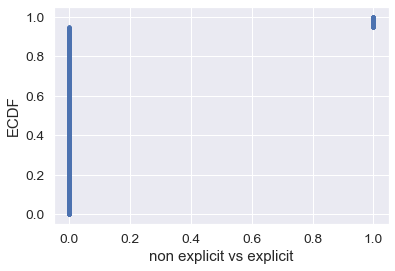

In [67]:
#  1=explicit & 0=non_explicit
#Only a few songs contain explicit content

x=np.sort(full["explicit_encoded"])
y=np.arange(1,len(x)+1)/len(x)
_=plt.plot(x,y,marker=".",linestyle="none")
_=plt.xlabel("non explicit vs explicit")
_=plt.ylabel("ECDF")
#plt.margins(0.02)
#plt.show()

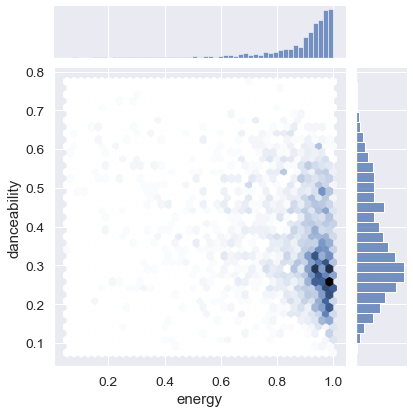

In [68]:
#Most numbers of songs have energy between 0.8-1 while most songs are Not danceable
sns.jointplot(x="tf_energy",y="tf_danceability",data=full[["tf_energy","tf_danceability"]],
              kind="hex").set_axis_labels("energy","danceability")

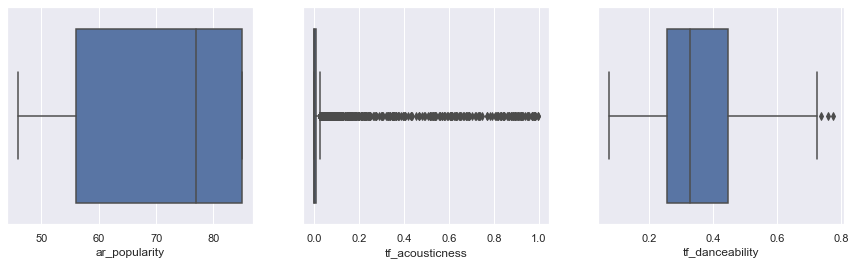

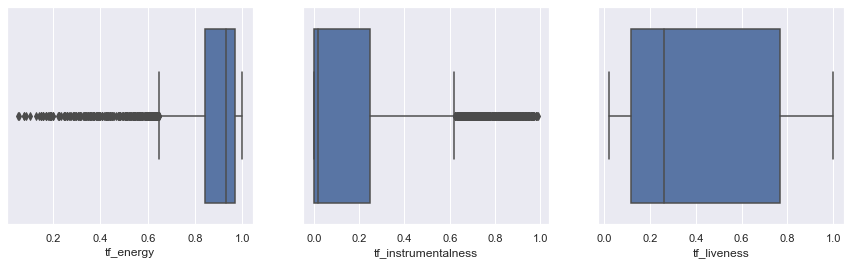

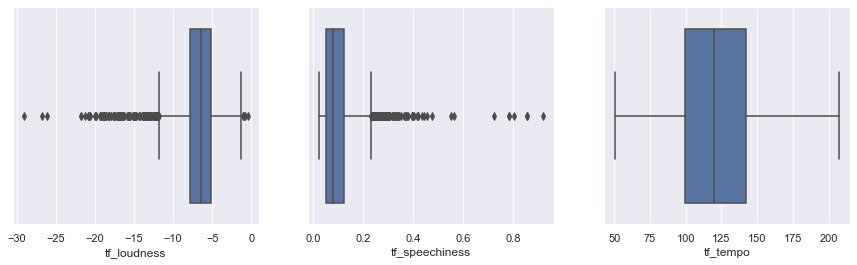

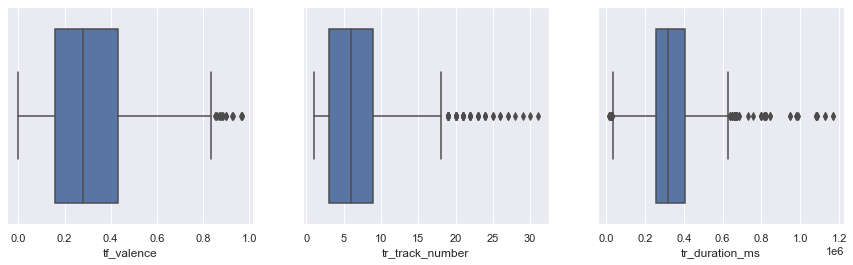

In [69]:
#Boxploting features

sns.set() # Used to set the default seaborn theme, scaling and colour pallete 

f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
sns.boxplot(full['ar_popularity'], ax=axes[0])
sns.boxplot(full['tf_acousticness'], ax=axes[1])
sns.boxplot(full['tf_danceability'], ax=axes[2])


f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
sns.boxplot(full['tf_energy'], ax=axes[0])
sns.boxplot(full['tf_instrumentalness'], ax=axes[1])
sns.boxplot(full['tf_liveness'], ax=axes[2])

f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
sns.boxplot(full['tf_loudness'], ax=axes[0])
sns.boxplot(full['tf_speechiness'], ax=axes[1])
sns.boxplot(full['tf_tempo'], ax=axes[2])

f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
sns.boxplot(full['tf_valence'], ax=axes[0])
sns.boxplot(full['tr_track_number'], ax=axes[1])
sns.boxplot(full['tr_duration_ms'], ax=axes[2])



plt.show()

## CLEANING DATA AND PREPROCESSING

In [70]:
#checking num values after feature engineering
new_features_added.isnull().values.sum()

3736

In [71]:
new_features_added.isnull().sum()

ar_name                467
ar_popularity          467
tr_name                  0
tr_popularity            0
al_name                467
al_release_date        467
al_total_tracks        467
al_album_type          467
ar_followers_total     467
tr_duration_ms           0
tr_track_number          0
tf_danceability          0
tf_energy                0
tf_loudness              0
tf_speechiness           0
tf_acousticness          0
tf_instrumentalness      0
tf_liveness              0
tf_valence               0
tf_tempo                 0
tf_key                   0
tf_mode                  0
tr_explicit              0
have_lyrics              0
tracks_per_artist      467
lyr_encoded              0
explicit_encoded         0
dtype: int64

In [72]:
#creating a new dataframe consisting of all the null entries including new features

null_data = new_features_added[new_features_added.isnull().any(axis=1)]
null_data.shape

(467, 27)

In [73]:
null_data.head(1)

,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,tf_danceability,tf_energy,tf_loudness,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_key,tf_mode,tr_explicit,have_lyrics,tracks_per_artist,lyr_encoded,explicit_encoded
17,NaN,NaN,"Churchill’s Speech - Live in Mexico City, Pala...",25,NaN,NaN,NaN,NaN,NaN,38826,1,0.338,0.904,-12.851,0.161,0.433,0.134,0.91,0.0394,85.128,5,0,False,lyrics,NaN,1,0


## Inspecting null data for later investigation

In [74]:
#null_data.index.tolist()

## ANALYSING DATA, FINDING PATTERNS, MAKING AD HOC QUERIES

### Creating "analysis" DataFrame that will be used for ad hoc queries.

In [75]:
analysis=new_features_added

## Classifying features --same method can be applied to all features

In [76]:
high_danc=analysis['tf_danceability']>=0.70
med_danc=(analysis['tf_danceability']>=0.5) & (analysis['tf_danceability']<0.70)
low_danc=analysis['tf_danceability']<0.49



In [77]:
data=[high_danc.sum(),med_danc.sum(),low_danc.sum()]
danc=pd.DataFrame(data,columns=['counts'],
                   index=['High danceability','Medium Danceability','Low Danceability'])
danc



,counts
High danceability,7
Medium Danceability,461
Low Danceability,2375


## Tracks per Artist

## Plotting artists

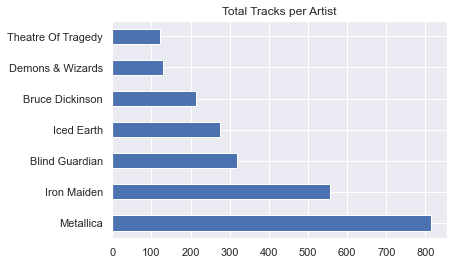

In [78]:
analysis.ar_name.value_counts().head(20).plot(kind='barh')
plt.title('Total Tracks per Artist')
plt.show()

## Comparing the DataFrames that were created previously based on feature engineering

### lyrics VS no_lyrics

In [79]:
first = pd.DataFrame(lyr.mean(),columns= ['lyrics'])
sec = pd.DataFrame(no_lyr.mean(),columns= ['no_lyrics'])

comparing_lyrics_vs_no_lyrics = pd.concat([first,sec], axis=1)
comparing_lyrics_vs_no_lyrics




,lyrics,no_lyrics
ar_popularity,6.950290e+01,6.925490e+01
tr_popularity,2.481431e+01,1.936538e+01
al_total_tracks,2.630505e+01,7.205882e+01
ar_followers_total,7.112694e+06,9.461004e+06
tr_duration_ms,3.410395e+05,2.634160e+05
tr_track_number,6.767976e+00,7.750000e+00
tf_danceability,3.515340e-01,4.683135e-01
tf_energy,8.790947e-01,6.418077e-01
tf_loudness,-6.609223e+00,-1.087856e+01
tf_speechiness,9.855545e-02,3.465769e-02


### explicit VS non_explicit

In [80]:


first = pd.DataFrame(explicit.mean(),columns= ['explicit_lyrics'])
sec = pd.DataFrame(non_explicit.mean(),columns= ['non_explicit_lyrics'])

comparing_eng_vs_greek = pd.concat([first,sec], axis=1)
comparing_eng_vs_greek

,explicit_lyrics,non_explicit_lyrics
ar_popularity,8.245185e+01,6.892593e+01
tr_popularity,3.108442e+01,2.415786e+01
al_total_tracks,6.665926e+01,2.745098e+01
ar_followers_total,1.486617e+07,6.914302e+06
tr_duration_ms,3.556776e+05,3.351458e+05
tr_track_number,8.422078e+00,6.769231e+00
tf_danceability,2.912727e-01,3.564373e-01
tf_energy,9.473182e-01,8.661105e-01
tf_loudness,-6.430195e+00,-6.862825e+00
tf_speechiness,1.353396e-01,9.501983e-02


#  TOP 20 tracks with regards to features

In [81]:
top_20 = analysis[['ar_name','ar_popularity','tr_name','tr_popularity','al_name','al_release_date','al_album_type',
                     'al_total_tracks', 'ar_followers_total','tr_duration_ms',
                    'tf_danceability','tf_energy','tf_loudness','tf_speechiness','tf_acousticness',
                    'tf_instrumentalness','tf_liveness','tf_valence','tf_tempo','tf_key','tf_mode','tr_explicit','al_album_type']]


## Top positive tracks

In [82]:
top_20[['ar_name',"tr_name",'tf_valence']].sort_values(by='tf_valence',ascending=False).head(20)

,ar_name,tr_name,tf_valence
829,Bruce Dickinson,Confeos - 2001 Remaster,0.970
2598,Metallica,...And Justice for All - 1988 / From James' Ri...,0.968
2530,Metallica,"...And Justice for All (1988, From James' Riff...",0.967
2658,Metallica,Leper Messiah - 1985 / From James' Riff Tapes 2,0.932
2708,Metallica,"Leper Messiah (1985, from James' Riff Tapes II)",0.924
1008,NaN,Zulu Lulu,0.902
1018,NaN,Zulu Lulu,0.902
998,Bruce Dickinson,Zulu Lulu,0.902
2531,Metallica,"Eye of the Beholder (1987, From James' Riff Ta...",0.885
2600,Metallica,Eye of the Beholder - 1987 / From James' Riff ...,0.884


## Top Sad Tracks

In [83]:
top_20[['ar_name',"tr_name",'tf_valence']].sort_values(by='tf_valence',ascending=True).head(20)

,ar_name,tr_name,tf_valence
2647,Metallica,Battery - 1985 / From James' Riff Tapes,0.0000
1256,Blind Guardian,Lammoth - Remastered 2007,0.0000
2697,Metallica,"Battery (1985, from James' Riff Tapes)",0.0000
1645,Iced Earth,Vengeance Is Mine,0.0263
1575,Iced Earth,Vengeance Is Mine - live in Athens,0.0281
1222,Blind Guardian,War of Wrath - Live,0.0299
1236,Blind Guardian,The Bard's Song: In the Forest - Live,0.0309
460,Iron Maiden,Iron Maiden - Live at Donington; 1998 Remaster...,0.0313
2506,Metallica,The Ecstasy of Gold,0.0313
492,NaN,Iron Maiden - Live at Donington; 1998 Remaster...,0.0314


## Top energetic Tracks

In [84]:
top_20[['ar_name',"tr_name",'tf_energy']].sort_values(by='tf_energy',ascending=False).head(20)

,ar_name,tr_name,tf_energy
1493,Iced Earth,Divide Devour,0.999
428,Iron Maiden,Sanctuary - Live; 1998 Remastered Version,0.998
491,NaN,2 Minutes To Midnight - Live at Donington; 199...,0.998
495,NaN,Sanctuary - Live at Donington; 1998 Remastered...,0.998
405,Iron Maiden,Sanctuary - Live; 1998 Remastered Version,0.998
459,Iron Maiden,2 Minutes To Midnight - Live at Donington; 199...,0.998
2858,Metallica,"Hit The Lights (Live at Espace Balard, Paris, ...",0.998
409,Iron Maiden,Iron Maiden - Live; 1998 Remastered Version,0.998
1482,Iced Earth,Behold the Wicked Child,0.998
463,Iron Maiden,Sanctuary - Live at Donington; 1998 Remastered...,0.998


## Top sluggish tracks

In [85]:
top_20[['ar_name',"tr_name","tr_explicit"]].sort_values(by="tr_explicit",ascending=True).tail(20)

,ar_name,tr_name,tr_explicit
2555,Metallica,Dyers Eve,True
2356,Metallica,So What,True
2358,Metallica,Overkill - Live,True
2359,Metallica,Damage Case - Live,True
2361,Metallica,Too Late Too Late - Live,True
451,Iron Maiden,Tailgunner - Live at Donington; 1998 Remastere...,True
2505,Metallica,Dyers Eve (Remastered),True
2375,NaN,Fuel,True
135,Iron Maiden,The Number of the Beast - Live At Estadio Naci...,True
134,Iron Maiden,"Iron Maiden - Live At Estadio Nacional, Santiago",True


## Top accoustic Tracks

In [86]:
top_20[['ar_name',"tr_name",'tf_acousticness']].sort_values(by='tf_acousticness',ascending=False).head(20)

,ar_name,tr_name,tf_acousticness
2705,Metallica,"Disposable Heroes (1985, from Kirk's Riff Tapes)",0.995
2655,Metallica,Disposable Heroes - 1985 / From Kirk's Riff Tapes,0.995
2709,Metallica,"Orion (1985, from James' Riff Tapes)",0.985
2699,Metallica,"Master of Puppets (1985, from Kirk's Riff Tapes)",0.984
2659,Metallica,Orion - 1985 / From James' Riff Tapes,0.984
2649,Metallica,Master Of Puppets - 1985 / From Kirk's Riff Tapes,0.983
1755,Demons & Wizards,Chant - Remaster 2019,0.978
1792,Demons & Wizards,Chant - Remaster 2019,0.978
2647,Metallica,Battery - 1985 / From James' Riff Tapes,0.973
2697,Metallica,"Battery (1985, from James' Riff Tapes)",0.972


## top popular tracks

In [87]:
top_20[['ar_name',"tr_name",'tr_popularity']].sort_values(by='tr_popularity',ascending=False).head(20)

,ar_name,tr_name,tr_popularity
2471,Metallica,Nothing Else Matters,80
2464,Metallica,Enter Sandman,80
2476,NaN,Enter Sandman,75
2716,Metallica,Master Of Puppets,75
2467,Metallica,The Unforgiven,74
643,Iron Maiden,The Trooper - 2015 Remaster,73
2343,Metallica,Whiskey In The Jar,73
2559,Metallica,One,72
508,Iron Maiden,Fear of the Dark - 2015 Remaster,71
2841,NaN,For Whom The Bell Tolls - Remastered,70


## MOST POPULAR ARTIST

In [88]:
great=analysis
great=great.sort_values("ar_popularity",ascending=False).drop_duplicates("ar_name").sort_index()

In [89]:
most_pop=great[["ar_name","ar_popularity"]].sort_values(by="ar_popularity",ascending=False).head(20)
most_pop

,ar_name,ar_popularity
2896,Metallica,85.0
1,Iron Maiden,77.0
1069,Blind Guardian,59.0
718,Bruce Dickinson,56.0
1483,Iced Earth,54.0
1794,Demons & Wizards,46.0
1812,Theatre Of Tragedy,46.0
17,NaN,NaN


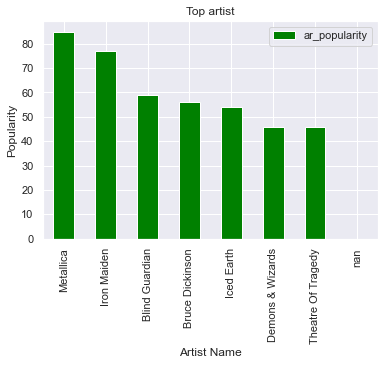

In [90]:

most_pop.plot.bar(x="ar_name",y="ar_popularity", title="Top artist",color="green")


plt.xlabel("Artist Name")
plt.ylabel("Popularity")
plt.show()

In [91]:
#Tracks popularity
#Creating a "track_popularity" DataFrame
track_popularity=analysis.sort_values("tr_popularity",ascending=False)

## Creating a dataframe arranging tracks by popularity

In [92]:
track_popularity.head(10)

,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,tf_danceability,tf_energy,tf_loudness,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_key,tf_mode,tr_explicit,have_lyrics,tracks_per_artist,lyr_encoded,explicit_encoded
2471,Metallica,85.0,Nothing Else Matters,80,Metallica,1991-08-12,12.0,album,17257877.0,388266,8,0.553,0.362,-11.218,0.0263,0.045800,0.000006,0.0750,0.158,142.352,4,0,False,lyrics,815.0,1,0
2464,Metallica,85.0,Enter Sandman,80,Metallica,1991-08-12,12.0,album,17257877.0,331266,1,0.577,0.828,-8.691,0.0298,0.002130,0.011400,0.0581,0.604,123.257,6,0,False,lyrics,815.0,1,0
2476,NaN,NaN,Enter Sandman,75,NaN,NaN,NaN,NaN,NaN,331573,1,0.579,0.824,-8.710,0.0300,0.002060,0.009030,0.0590,0.635,123.331,6,0,False,lyrics,NaN,1,0
2716,Metallica,85.0,Master Of Puppets,75,Master Of Puppets (Remastered),1986-03-03,8.0,album,17257877.0,515386,2,0.543,0.836,-9.110,0.0353,0.000647,0.431000,0.1530,0.560,105.173,4,0,False,lyrics,815.0,1,0
2467,Metallica,85.0,The Unforgiven,74,Metallica,1991-08-12,12.0,album,17257877.0,386493,4,0.540,0.584,-9.579,0.0254,0.010800,0.002960,0.2530,0.244,139.261,7,1,False,lyrics,815.0,1,0
643,Iron Maiden,77.0,The Trooper - 2015 Remaster,73,Piece of Mind (2015 Remaster),1983,9.0,album,6201079.0,252733,5,0.285,0.908,-4.601,0.0705,0.031800,0.009090,0.3110,0.669,159.756,4,0,False,lyrics,557.0,1,0
2343,Metallica,85.0,Whiskey In The Jar,73,Garage Inc.,1998-01-01,27.0,album,17257877.0,304693,9,0.511,0.970,-3.720,0.0414,0.000006,0.001360,0.1800,0.566,132.986,10,1,False,lyrics,815.0,1,0
2559,Metallica,85.0,One,72,...And Justice For All,1988-08-25,9.0,album,17257877.0,447440,4,0.437,0.695,-9.447,0.0617,0.001110,0.085700,0.1240,0.413,102.178,7,1,False,lyrics,815.0,1,0
508,Iron Maiden,77.0,Fear of the Dark - 2015 Remaster,71,Fear of the Dark (2015 Remaster),1992,12.0,album,6201079.0,438120,12,0.308,0.866,-5.671,0.0590,0.000739,0.001410,0.2320,0.227,109.825,2,0,False,lyrics,557.0,1,0
2841,NaN,NaN,For Whom The Bell Tolls - Remastered,70,NaN,NaN,NaN,NaN,NaN,309973,3,0.518,0.858,-6.147,0.0672,0.005630,0.003490,0.0598,0.249,117.897,0,1,False,lyrics,NaN,1,0


## Creating  a new DataFrame "norm", excluding null values.

## The DataFrame will be normalized and then used for machine learning and predictive models

## Creating  a new DataFrame "norm", excluding null values.

## The DataFrame will be normalized and then used for machine learning and predictive models

In [93]:
norm=new_features_added[["ar_popularity","tr_popularity","al_total_tracks",
"ar_followers_total","tr_duration_ms","tr_track_number","tf_danceability","tf_energy","tf_loudness",
"tf_speechiness","tf_acousticness","tf_instrumentalness","tf_liveness","tf_valence","tf_tempo","tf_mode",
  "lyr_encoded","explicit_encoded","tracks_per_artist"]]

In [94]:
#cleaning method=dropping rows with null values

norm.dropna(inplace=True)

<ipython-input-94-f73cef80f1c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm.dropna(inplace=True)


In [95]:
#checking that nun values have been eradicated

norm.isnull().sum()

ar_popularity          0
tr_popularity          0
al_total_tracks        0
ar_followers_total     0
tr_duration_ms         0
tr_track_number        0
tf_danceability        0
tf_energy              0
tf_loudness            0
tf_speechiness         0
tf_acousticness        0
tf_instrumentalness    0
tf_liveness            0
tf_valence             0
tf_tempo               0
tf_mode                0
lyr_encoded            0
explicit_encoded       0
tracks_per_artist      0
dtype: int64

### Checking dataset before normalization

In [96]:
norm.head(5)

,ar_popularity,tr_popularity,al_total_tracks,ar_followers_total,tr_duration_ms,tr_track_number,tf_danceability,tf_energy,tf_loudness,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_mode,lyr_encoded,explicit_encoded,tracks_per_artist
0,77.0,41,17.0,6201079.0,38826,1,0.338,0.904,-12.851,0.1610,0.433000,0.13400,0.910,0.0394,85.128,0,1,0,557.0
1,77.0,43,17.0,6201079.0,298789,2,0.273,0.997,-4.956,0.1260,0.007680,0.04690,0.852,0.0704,127.267,1,1,0,557.0
2,77.0,41,17.0,6201079.0,312688,3,0.237,0.996,-4.678,0.1400,0.000254,0.10200,0.713,0.1010,113.782,1,1,0,557.0
3,77.0,40,17.0,6201079.0,354165,4,0.219,0.994,-5.088,0.1110,0.001240,0.00366,0.944,0.1660,96.345,0,1,0,557.0
4,77.0,41,17.0,6201079.0,556831,5,0.178,0.959,-5.648,0.0951,0.020700,0.01960,0.937,0.1590,80.827,1,1,0,557.0


### Applying normalization method by mean

In [97]:
norm=norm.apply(lambda x: (x - x.mean()) / x.std())

In [98]:
norm.aggregate(["mean","std","var"])

,ar_popularity,tr_popularity,al_total_tracks,ar_followers_total,tr_duration_ms,tr_track_number,tf_danceability,tf_energy,tf_loudness,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_mode,lyr_encoded,explicit_encoded,tracks_per_artist
mean,-3.508853e-16,9.356941e-17,-7.017706e-17,9.356941e-17,-1.023415e-16,2.339235e-17,-1.754427e-16,-1.286579e-16,-4.678471e-17,-4.678471e-17,-1.169618e-17,7.017706e-17,-6.432897e-17,-2.924044e-16,1.169618e-17,7.017706e-17,8.772133e-17,2.339235e-17,2.339235e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
var,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Checking differentiations in values after normalization

In [99]:
norm.head(5)

,ar_popularity,tr_popularity,al_total_tracks,ar_followers_total,tr_duration_ms,tr_track_number,tf_danceability,tf_energy,tf_loudness,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_mode,lyr_encoded,explicit_encoded,tracks_per_artist
0,0.507632,1.149592,-0.352085,-0.156201,-2.227422,-1.257379,-0.104965,0.212954,-2.077759,0.840858,2.226144,-0.230653,1.492458,-1.419157,-1.262617,-1.028175,0.13174,-0.242486,0.200291
1,0.507632,1.291929,-0.352085,-0.156201,-0.276531,-1.047686,-0.609786,0.793755,0.695569,0.365873,-0.288557,-0.524500,1.320464,-1.252614,0.141115,0.972197,0.13174,-0.242486,0.200291
2,0.507632,1.149592,-0.352085,-0.156201,-0.172226,-0.837994,-0.889380,0.787510,0.793223,0.555867,-0.332463,-0.338611,0.908273,-1.088221,-0.308097,0.972197,0.13174,-0.242486,0.200291
3,0.507632,1.078423,-0.352085,-0.156201,0.139039,-0.628301,-1.029176,0.775019,0.649200,0.162308,-0.326634,-0.670377,1.593281,-0.739019,-0.888957,-1.028175,0.13174,-0.242486,0.200291
4,0.507632,1.149592,-0.352085,-0.156201,1.659945,-0.418609,-1.347602,0.556438,0.452485,-0.053471,-0.211577,-0.616601,1.572524,-0.776625,-1.405892,0.972197,0.13174,-0.242486,0.200291
